<a href="https://colab.research.google.com/github/annazinkevich/machine_learning/blob/Keras/HandwrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Распознавание рукописных цифр базы MNIST

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline

Загрузка обучающей и тестовой выборок

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Нормализация входных данных

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

Преобразование выходных значений в векторы по категориям

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Отображение первых 25 изображений из обучающей выборки

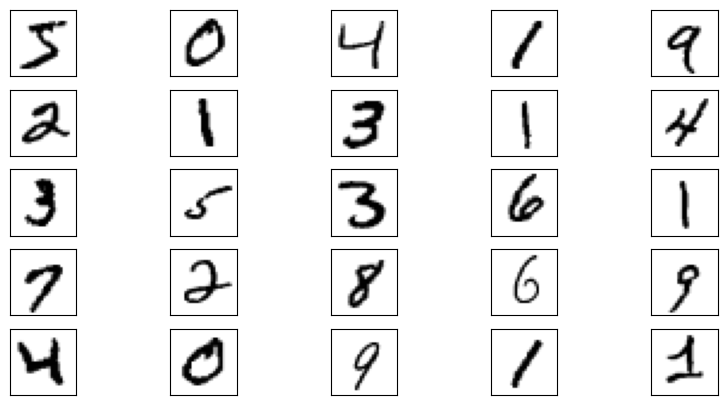

In [ ]:
plt.figure(figsize=(10,5))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

Формирование модели НС и вывод ее структуры в консоль

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28,28,1)),           #входной слой
    Dense(128, activation='relu'),            #скрытый слой
    Dense(10, activation='softmax')           #выходной слой
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


Компиляция НС с оптимизацией по Adam и критерием качества - категориальная кросс-энтропия

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Запуск процесса обучения: 80% - обучающая выборка, 20% - выборка валидации

In [ ]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2844 - accuracy: 0.9196 - val_loss: 0.1542 - val_accuracy: 0.9578
Epoch 2/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1271 - accuracy: 0.9629 - val_loss: 0.1093 - val_accuracy: 0.9686
Epoch 3/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0877 - accuracy: 0.9736 - val_loss: 0.1043 - val_accuracy: 0.9703
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0637 - accuracy: 0.9809 - val_loss: 0.0918 - val_accuracy: 0.9736
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.0921 - val_accuracy: 0.9728


Проверка на тестовой выборке

In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9738


[0.08224695175886154, 0.973800003528595]

Проверка распознавания цифр

1/1 [==============================] - 0s 106ms/step
[[2.3220471e-08 2.8225307e-08 3.2658463e-05 9.6097199e-04 1.6011127e-09
  7.0520758e-07 3.8426865e-13 9.9898416e-01 1.0998072e-06 2.0506335e-05]]
Распознанная цифра: 7


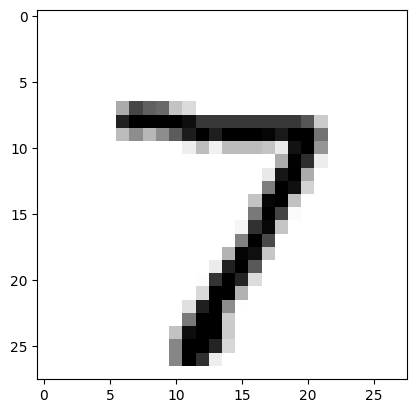

In [ ]:
n = 0
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f"Распознанная цифра: {np.argmax(res)}")

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

Распознавание всей тестовой выборки

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Выделение неверных вариантов

In [ ]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(262, 28, 28)


Вывод первых пяти неверных результатов

Значение НС: 6


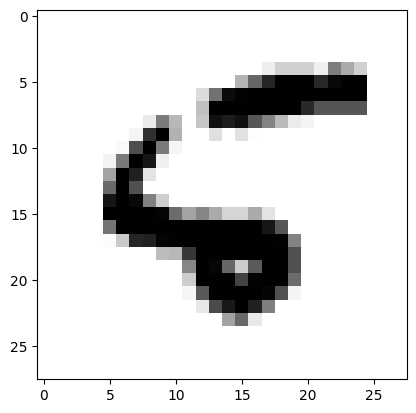

Значение НС: 2


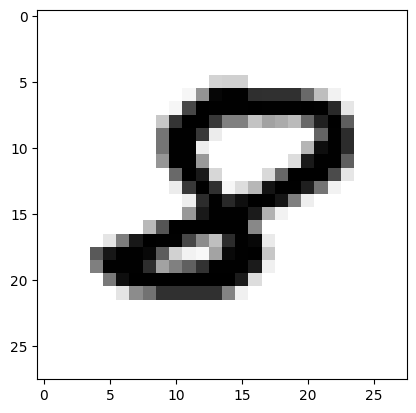

Значение НС: 5


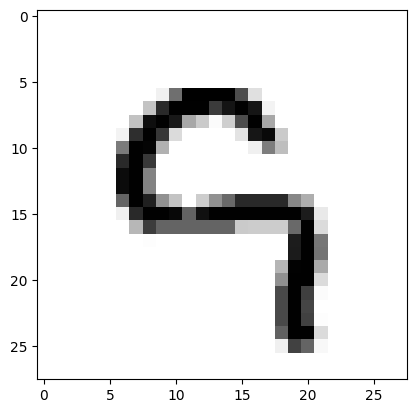

Значение НС: 4


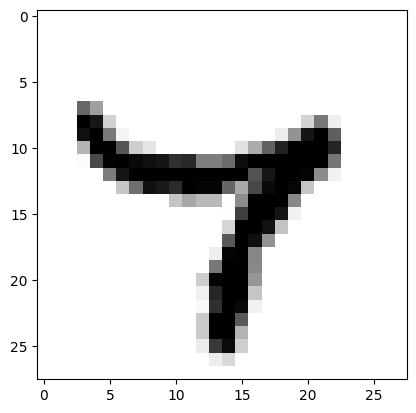

Значение НС: 5


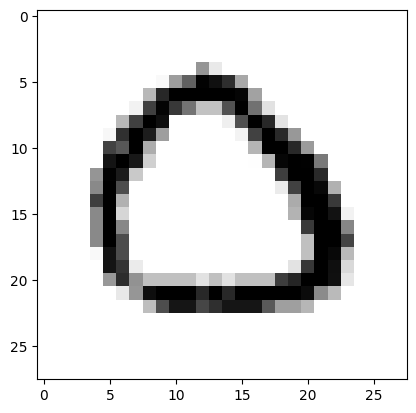

In [ ]:
for i in range(5):
  print("Значение НС: "+str(p_false[i]))
  plt.imshow(x_false[i],cmap=plt.cm.binary)
  plt.show()